In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# Load data
file_path = "../csvs/shuffled_data.csv"  # Update with your Colab file path
data = pd.read_csv(file_path)

In [4]:
# Split into features and target
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


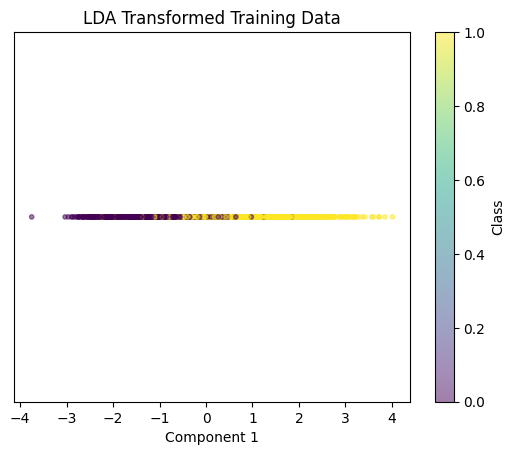

In [5]:
# 1. Supervised Feature Reduction (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Visualize LDA Transformed Training Data
plt.scatter(X_train_lda[:, 0], [0] * len(X_train_lda), c=y_train, cmap='viridis', s=10, alpha=0.5)
plt.title("LDA Transformed Training Data")
plt.xlabel("Component 1")
plt.yticks([])
plt.colorbar(label='Class')
plt.show()

In [8]:
model = LogisticRegression()

param_grid = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 10, 100],           # Regularization strength
    'penalty': ['l1','l2', None]  # Regularization type
}

# GridSearchCV for Original Features
grid_search_original = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search_original.fit(X_train, y_train)

# GridSearchCV for LDA-Reduced Features
grid_search_lda = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search_lda.fit(X_train_lda, y_train)

# Best parameters and accuracy
print("Best parameters (Original Features):", grid_search_original.best_params_)
print("Best accuracy (Original Features):", grid_search_original.best_score_)
print("Best parameters (LDA Features):", grid_search_lda.best_params_)
print("Best accuracy (LDA Features):", grid_search_lda.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters (Original Features): {'C': 0.1, 'penalty': 'l2'}
Best accuracy (Original Features): 0.8186096797938903
Best parameters (LDA Features): {'C': 0.01, 'penalty': None}
Best accuracy (LDA Features): 0.87235001840265


In [9]:
# 3. Evaluate the Best Model on Test Data
# Original Features
best_lr_original = grid_search_original.best_estimator_
y_pred_original = best_lr_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
print(f"Original Features - Accuracy: {accuracy_original:.4f}, F1: {f1_original:.4f}, Precision: {precision_original:.4f}, Recall: {recall_original:.4f}")

Original Features - Accuracy: 0.8429, F1: 0.8591, Precision: 0.8621, Recall: 0.8562


In [10]:
# LDA-Reduced Features
best_lr_lda = grid_search_lda.best_estimator_
y_pred_lda = best_lr_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
print(f"LDA Features - Accuracy: {accuracy_lda:.4f}, F1: {f1_lda:.4f}, Precision: {precision_lda:.4f}, Recall: {recall_lda:.4f}")


LDA Features - Accuracy: 0.9119, F1: 0.9215, Precision: 0.9184, Recall: 0.9247


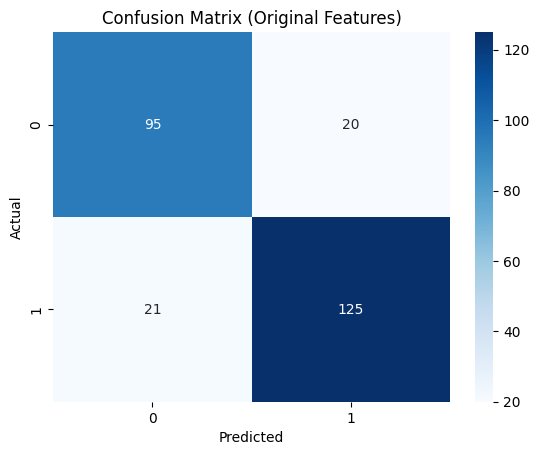

In [11]:
# 4. Confusion Matrix for Both Models
# Original Features
cm_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Original Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


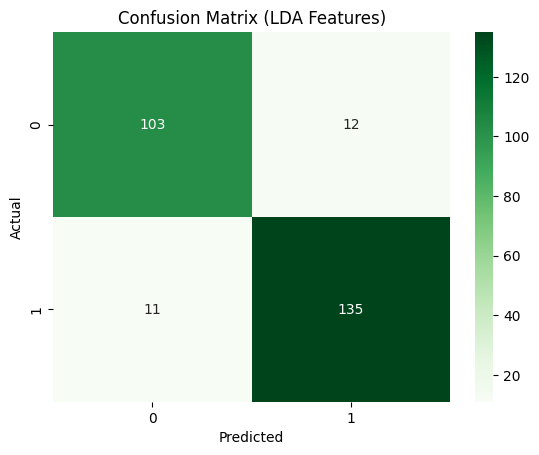

In [12]:
# LDA Features
cm_lda = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (LDA Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
model = MLPClassifier()

# Define parameter grid for GridSearch
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,),(10, 10), (50, 50)],  # Number of neurons in each layer
    'activation': ['tanh', 'relu', 'sigmoid'],                 # Activation functions
    'solver': ['sgd', 'adam'],                      # Optimizers
    'learning_rate': ['constant', 'adaptive'],      # Learning rate schedule
    'alpha': [0.0001, 0.001, 0.01, 0.1],                # L2 regularization parameter
}

# GridSearchCV for Original Features
grid_search_original = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search_original.fit(X_train, y_train)

# GridSearchCV for LDA-Reduced Features
grid_search_lda = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search_lda.fit(X_train_lda, y_train)

# Best parameters and accuracy
print("Best parameters (Original Features):", grid_search_original.best_params_)
print("Best accuracy (Original Features):", grid_search_original.best_score_)
print("Best parameters (LDA Features):", grid_search_lda.best_params_)
print("Best accuracy (LDA Features):", grid_search_lda.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [30]:
best_nn_original = grid_search_original.best_estimator_
y_pred_original = best_nn_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
print(f"Original Features - Accuracy: {accuracy_original:.4f}, F1: {f1_original:.4f}, Precision: {precision_original:.4f}, Recall: {recall_original:.4f}")

Original Features - Accuracy: 0.8084, F1: 0.8387, Precision: 0.7927, Recall: 0.8904


In [31]:
# LDA-Reduced Features
best_nn_lda = grid_search_lda.best_estimator_
y_pred_lda = best_nn_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
print(f"LDA Features - Accuracy: {accuracy_lda:.4f}, F1: {f1_lda:.4f}, Precision: {precision_lda:.4f}, Recall: {recall_lda:.4f}")

LDA Features - Accuracy: 0.9119, F1: 0.9210, Precision: 0.9241, Recall: 0.9178


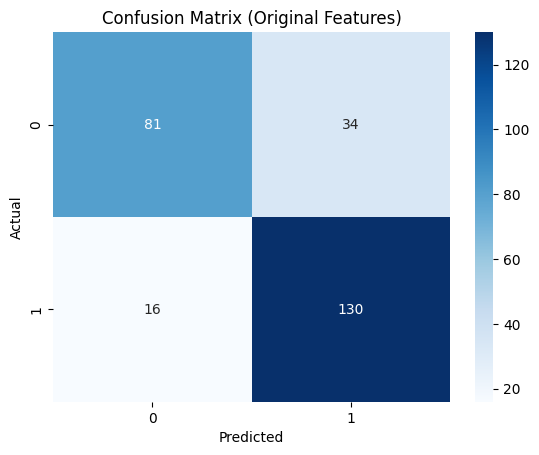

In [32]:
# 4. Confusion Matrix for Both Models
# Original Features
cm_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Original Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

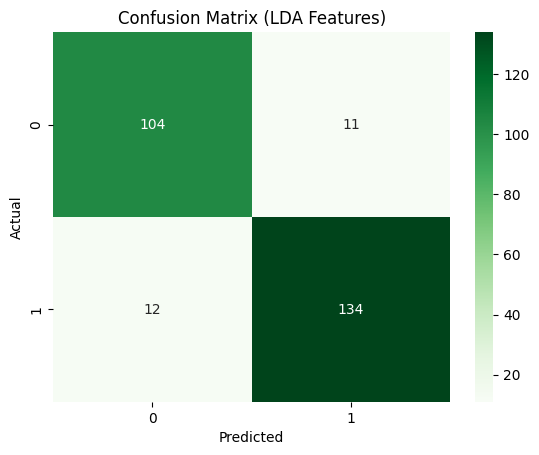

In [33]:
# LDA Features
cm_lda = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (LDA Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       115
           1       0.86      0.86      0.86       146

    accuracy                           0.84       261
   macro avg       0.84      0.84      0.84       261
weighted avg       0.84      0.84      0.84       261

Accuracy: 0.8391, F1 Score: 0.8562, Precision: 0.8562, Recall: 0.8562
[[ 94  21]
 [ 21 125]]


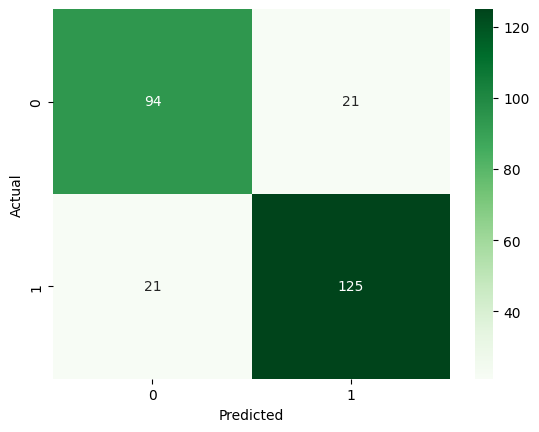

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train_lda, y_train)
y_pred = rf.predict(X_test_lda)
print(classification_report(y_pred, y_test)) 
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()